# K-attribute analysis
This notebook aims to conduct analysis on:
1. the outflows' entropy distribution.
2. the degree distribution.


In [ ]:
# 2020.10. new york.

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
import networkx as nx
import pickle
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.neighbors import kneighbors_graph
from matplotlib.cm import get_cmap

# Load your numpy array and node to CBG mapping
flow_matrix = np.load(r'data\Mobility\cbg_visit_2019-3_2.npy')

# Set the diagonal elements to zero
np.fill_diagonal(flow_matrix, 0)

# Load the id_dict_2.pkl
with open(r'data\Mobility\id_dict_2.pkl', 'rb') as f:
    id_dict = pickle.load(f)

# Load the Shapefile
gdf = gpd.read_file(r"arcgis project\cbgs\cbgs_of_cities\Los_Angeles_city.shp")
# Convert the WKT centroid strings into shapely Point objects
gdf['Centroid'] = gdf['Centroid'].apply(wkt.loads)

# Define function to create graph for given k
def create_graph(k):
    sorted_indices = np.argsort(-flow_matrix, axis=1)
    edges = [(i, j) for i in range(flow_matrix.shape[0]) for j in sorted_indices[i, :k]]
    G = nx.DiGraph()
    G.add_edges_from(edges)
    return G,edges


k_values = [160, 250, 337]

for k in k_values:
    top_k_flows_G, top_k_flows_graph = create_graph(k)




In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import networkx as nx

# Load flow matrix
flow_matrix = np.load(r'data\Mobility\cbg_visit_2019-03_2.npy')  # replace this with your actual .npy file
#flow_matrix = np.random.randint(1, 100, (100, 100))  # mock-up flow matrix
# Set the diagonal elements to zero
np.fill_diagonal(flow_matrix, 0)

num_nodes = flow_matrix.shape[0]

# Normalize flow matrix row-wise
row_sums = flow_matrix.sum(axis=1, keepdims=True)
normalized_matrix = flow_matrix / row_sums

# Dataframe to store results
df = pd.DataFrame()

for k in range(130, 2000, 500):
    # Find top k flows
    top_k_indices = np.argsort(normalized_matrix, axis=1)[:, -k:]
    top_k_flows = np.take_along_axis(normalized_matrix, top_k_indices, axis=1)

    # Calculate entropy
    entropy = [stats.entropy(row) for row in top_k_flows]
    
    # Add to dataframe
    df['entropy_k_{}'.format(k)] = entropy

print(df)


C:\Users\zwy99\AppData\Local\Temp\ipykernel_34856\2711159039.py:16: RuntimeWarning: invalid value encountered in divide
  normalized_matrix = flow_matrix / row_sums


      entropy_k_130  entropy_k_630  entropy_k_1130  entropy_k_1630
0          4.556320       4.837729        4.837729        4.837729
1          3.820335       3.820335        3.820335        3.820335
2          4.500678       4.500678        4.500678        4.500678
3          4.428443       4.931469        4.931469        4.931469
4          4.514108       4.944779        4.944779        4.944779
...             ...            ...             ...             ...
2504       4.547619       4.961201        4.961201        4.961201
2505       4.580243       4.598368        4.598368        4.598368
2506       4.504571       4.615949        4.615949        4.615949
2507       4.526777       4.978965        4.978965        4.978965
2508       4.486918       4.948498        4.948498        4.948498

[2509 rows x 4 columns]


      entropy_k_130  entropy_k_630  entropy_k_1130  entropy_k_1630  \
0          4.556320       4.837729        4.837729        4.837729   
1          3.820335       3.820335        3.820335        3.820335   
2          4.500678       4.500678        4.500678        4.500678   
3          4.428443       4.931469        4.931469        4.931469   
4          4.514108       4.944779        4.944779        4.944779   
...             ...            ...             ...             ...   
2504       4.547619       4.961201        4.961201        4.961201   
2505       4.580243       4.598368        4.598368        4.598368   
2506       4.504571       4.615949        4.615949        4.615949   
2507       4.526777       4.978965        4.978965        4.978965   
2508       4.486918       4.948498        4.948498        4.948498   

              CBG  
0     60372185002  
1     60372966004  
2     60372184004  
3     60372123051  
4     60372089041  
...           ...  
2504  60372293001  

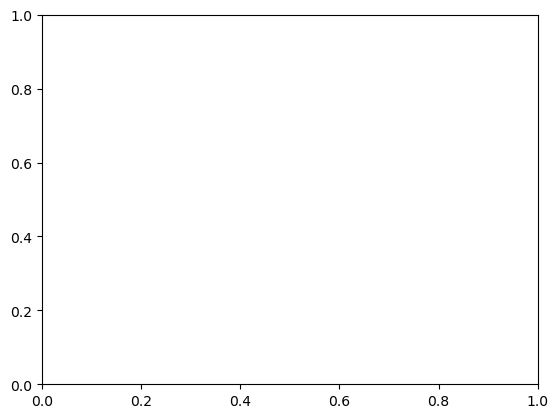

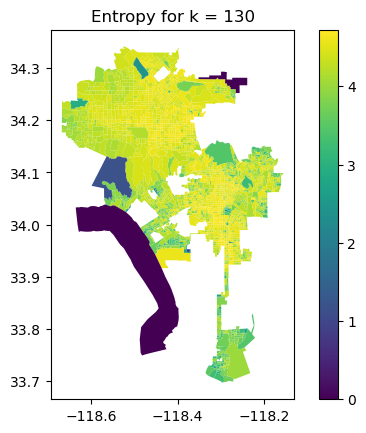

<Figure size 640x480 with 0 Axes>

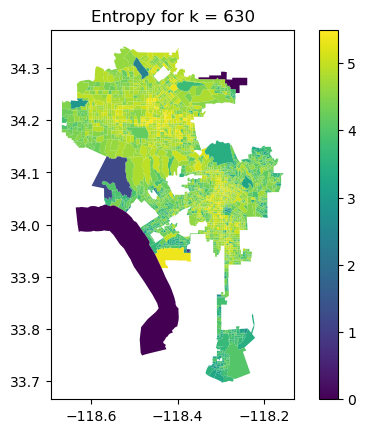

<Figure size 640x480 with 0 Axes>

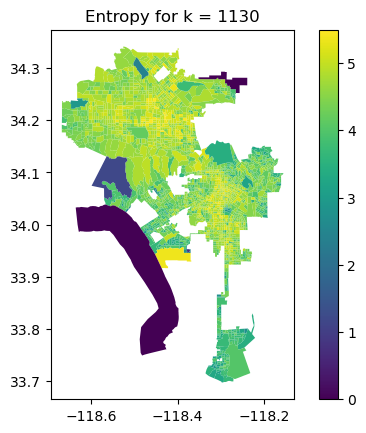

<Figure size 640x480 with 0 Axes>

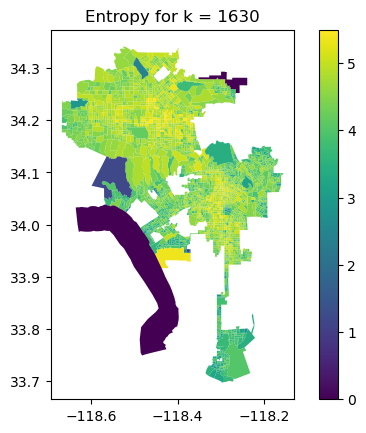

<Figure size 640x480 with 0 Axes>

In [15]:
import pandas as pd
import geopandas as gpd
import pickle
import matplotlib.pyplot as plt

# Load node to CBG mapping
with open(r"data\Mobility\id_dict_2.pkl", 'rb') as f:
    node_to_cbg = pickle.load(f)


# Create a DataFrame from the mapping and merge it with the entropy data
mapping_df = pd.DataFrame.from_dict(node_to_cbg, orient='index', columns=['CBG'])
df1 = df.merge(mapping_df, left_index=True, right_index=True)
print(df1)
# Load the shapefile
gdf = gpd.read_file(r"arcgis project\cbgs\cbgs_of_cities\Los_Angeles_city.shp")

# Merge entropy data with the shapefile data
gdf = gdf.merge(df1,left_on="CBG_Code", right_on='CBG')

# Plot the CBGs with colors indicating the entropy
fig, ax = plt.subplots(1, 1)
for k in range(130, 2000, 500):
    fig, ax = plt.subplots(1, 1)
    gdf.plot(column='entropy_k_{}'.format(k), ax=ax, legend=True)

    # Set the title to reflect the value of k
    ax.set_title(f'Entropy for k = {k}')

    # Save the figure to a file. Replace this with your preferred directory
    plt.savefig(f'entropy_map_{k}_of_LA.png', dpi=300, bbox_inches='tight')

    plt.show()
    # Clear the current figure after saving to prevent plots from overlapping
    plt.clf()



In [16]:
gdf.to_file("LA_entropy.shp")

C:\Users\zwy99\AppData\Local\Temp\ipykernel_34856\1817452110.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("LA_entropy.shp")


(array([  18.,    9.,   10.,   11.,   15.,   18.,   34.,  107.,  820.,
        5308.]),
 array([0.        , 0.4530253 , 0.9060506 , 1.3590759 , 1.8121012 ,
        2.26512649, 2.71815179, 3.17117709, 3.62420239, 4.07722769,
        4.53025299]),
 <BarContainer object of 10 artists>)

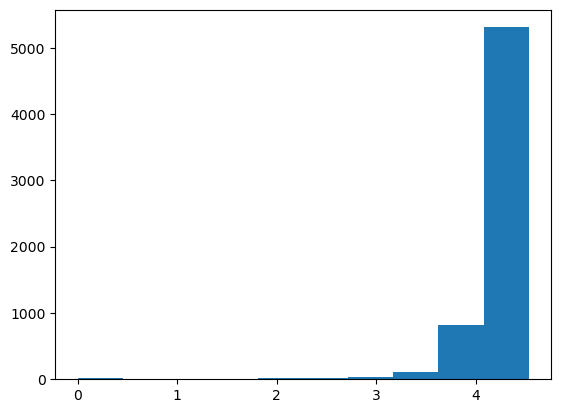

In [10]:
plt.hist(df["entropy_k_100"])

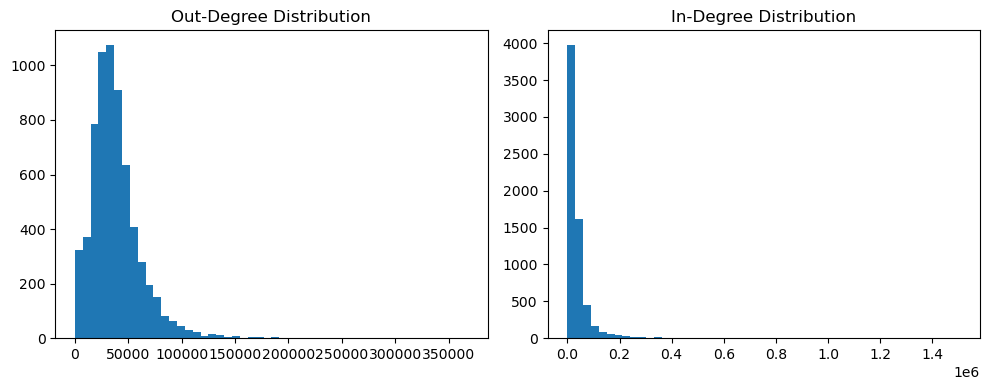

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2018-03_1.npy")

# Calculate the in-degree and out-degree distributions
out_degrees = np.sum(flows, axis=1)
in_degrees = np.sum(flows, axis=0)

# Plot the out-degree distribution
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(out_degrees, bins=50)
plt.title('Out-Degree Distribution')

# Plot the in-degree distribution
plt.subplot(122)
plt.hist(in_degrees, bins=50)
plt.title('In-Degree Distribution')

plt.tight_layout()
plt.show()


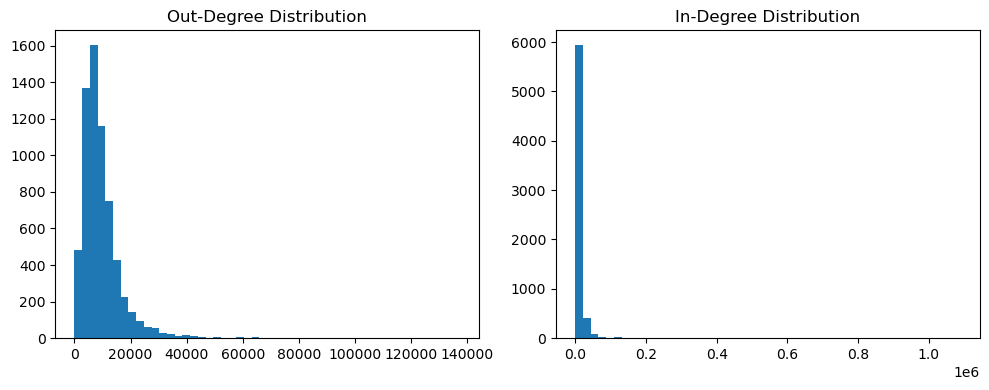

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2018-03_1.npy")

# Define t
t = 5  # replace with your desired value

# Number of nodes (units)
num_units = flows.shape[0]

# Initialize an empty array to hold the top t outflows for each node
top_t_flows = np.zeros_like(flows)

# Select top t outflows for each node
for i in range(num_units):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = flows[i, top_t_indices]

# Calculate the in-degree and out-degree distributions
out_degrees = np.sum(top_t_flows, axis=1)
in_degrees = np.sum(top_t_flows, axis=0)

# Plot the out-degree distribution
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(out_degrees, bins=50)
plt.title('Out-Degree Distribution')

# Plot the in-degree distribution
plt.subplot(122)
plt.hist(in_degrees, bins=50)
plt.title('In-Degree Distribution')

plt.tight_layout()
plt.show()

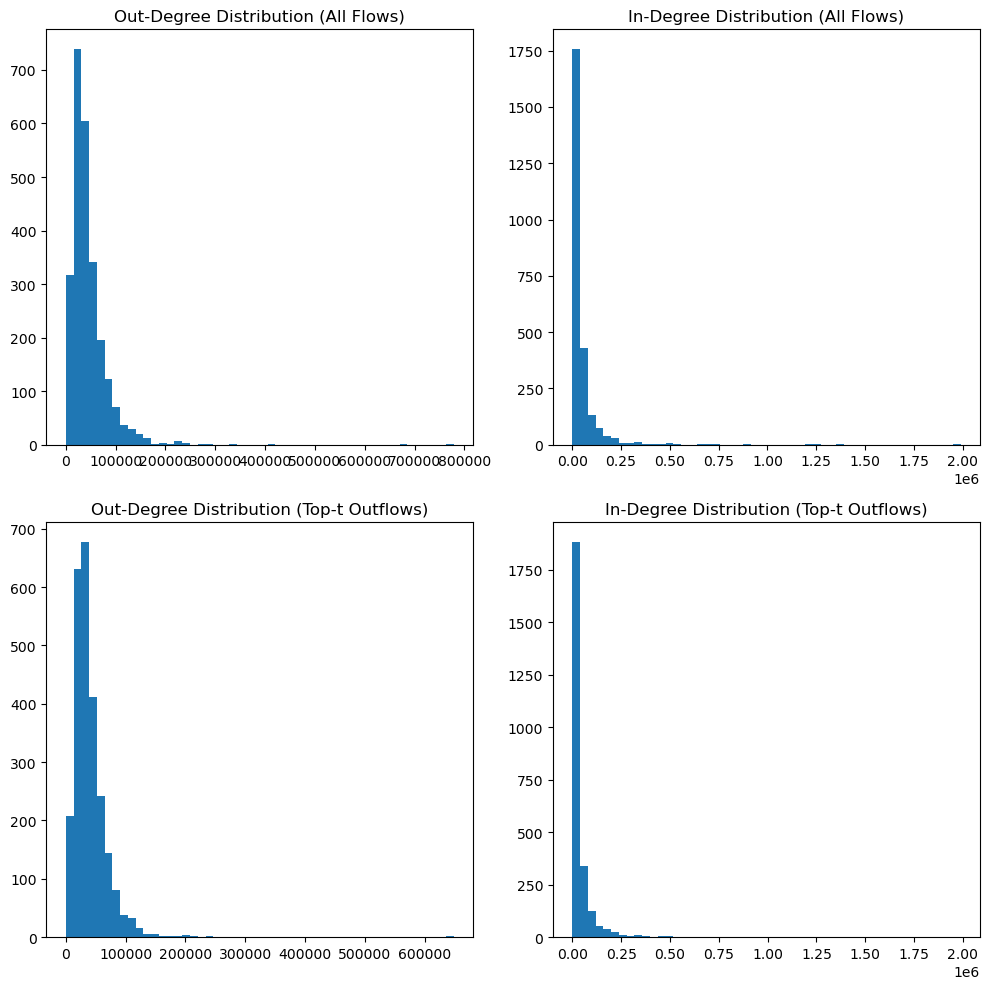

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130 # set this value based on your sparsification needs

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = flows[i, top_t_indices]

# Calculate the in-degree and out-degree distributions for all flows
in_degrees_all = np.sum(flows, axis=0)
out_degrees_all = np.sum(flows, axis=1)

# Calculate the in-degree and out-degree distributions for top-t outflows
in_degrees_t = np.sum(top_t_flows, axis=0)
out_degrees_t = np.sum(top_t_flows, axis=1)

# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# All flows
axs[0, 0].hist(out_degrees_all, bins=50)
axs[0, 0].set_title('Out-Degree Distribution (All Flows)')
axs[0, 1].hist(in_degrees_all, bins=50)
axs[0, 1].set_title('In-Degree Distribution (All Flows)')

# Top-t outflows
axs[1, 0].hist(out_degrees_t, bins=50)
axs[1, 0].set_title('Out-Degree Distribution (Top-t Outflows)')
axs[1, 1].hist(in_degrees_t, bins=50)
axs[1, 1].set_title('In-Degree Distribution (Top-t Outflows)')

plt.tight_layout()
plt.show()


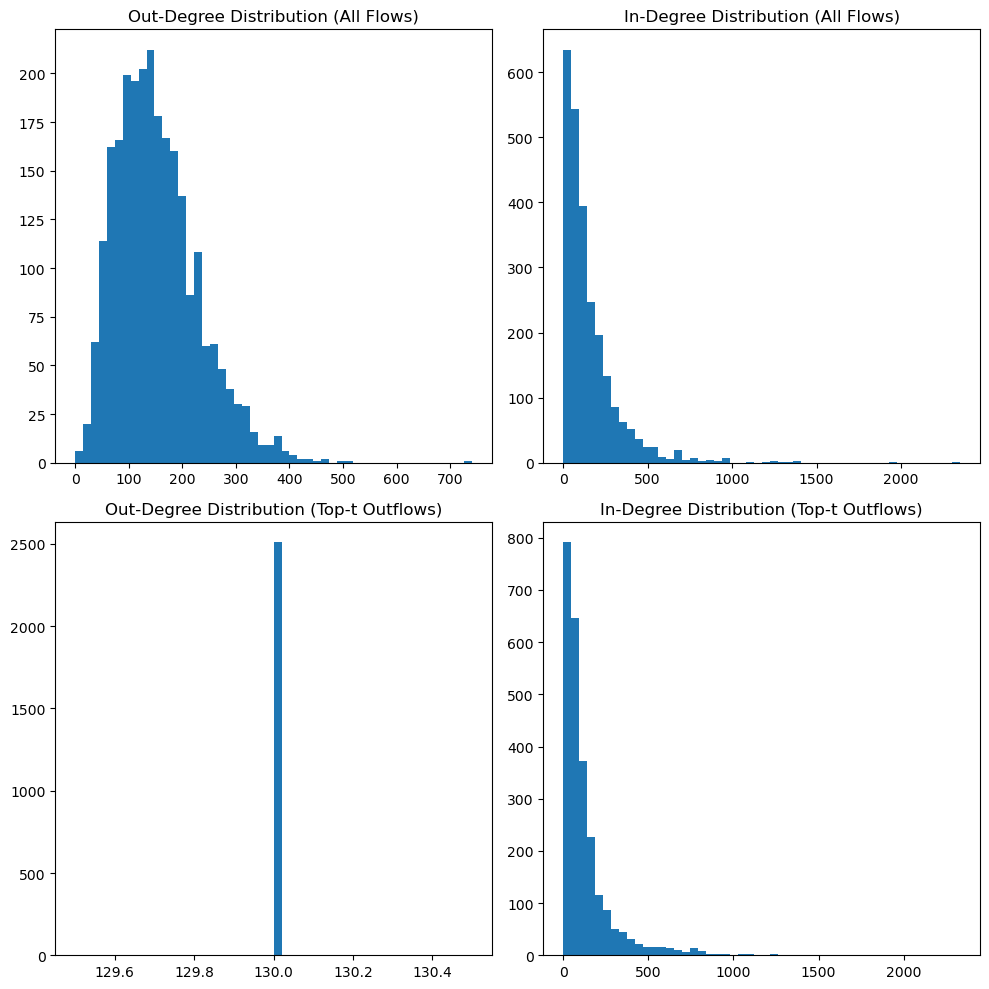

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130 # set this value based on your sparsification needs

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = 1 # flow presence marked as 1

# Convert the original flows to binary
flows_binary = (flows > 0).astype(int)

# Calculate the in-degree and out-degree distributions for all flows
in_degrees_all = np.sum(flows_binary, axis=0)
out_degrees_all = np.sum(flows_binary, axis=1)

# Calculate the in-degree and out-degree distributions for top-t outflows
in_degrees_t = np.sum(top_t_flows, axis=0)
out_degrees_t = np.sum(top_t_flows, axis=1)

# Plot the distributions
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# All flows
axs[0, 0].hist(out_degrees_all, bins=50)
axs[0, 0].set_title('Out-Degree Distribution (All Flows)')
axs[0, 1].hist(in_degrees_all, bins=50)
axs[0, 1].set_title('In-Degree Distribution (All Flows)')

# Top-t outflows
axs[1, 0].hist(out_degrees_t, bins=50)
axs[1, 0].set_title('Out-Degree Distribution (Top-t Outflows)')
axs[1, 1].hist(in_degrees_t, bins=50)
axs[1, 1].set_title('In-Degree Distribution (Top-t Outflows)')

plt.tight_layout()
plt.show()


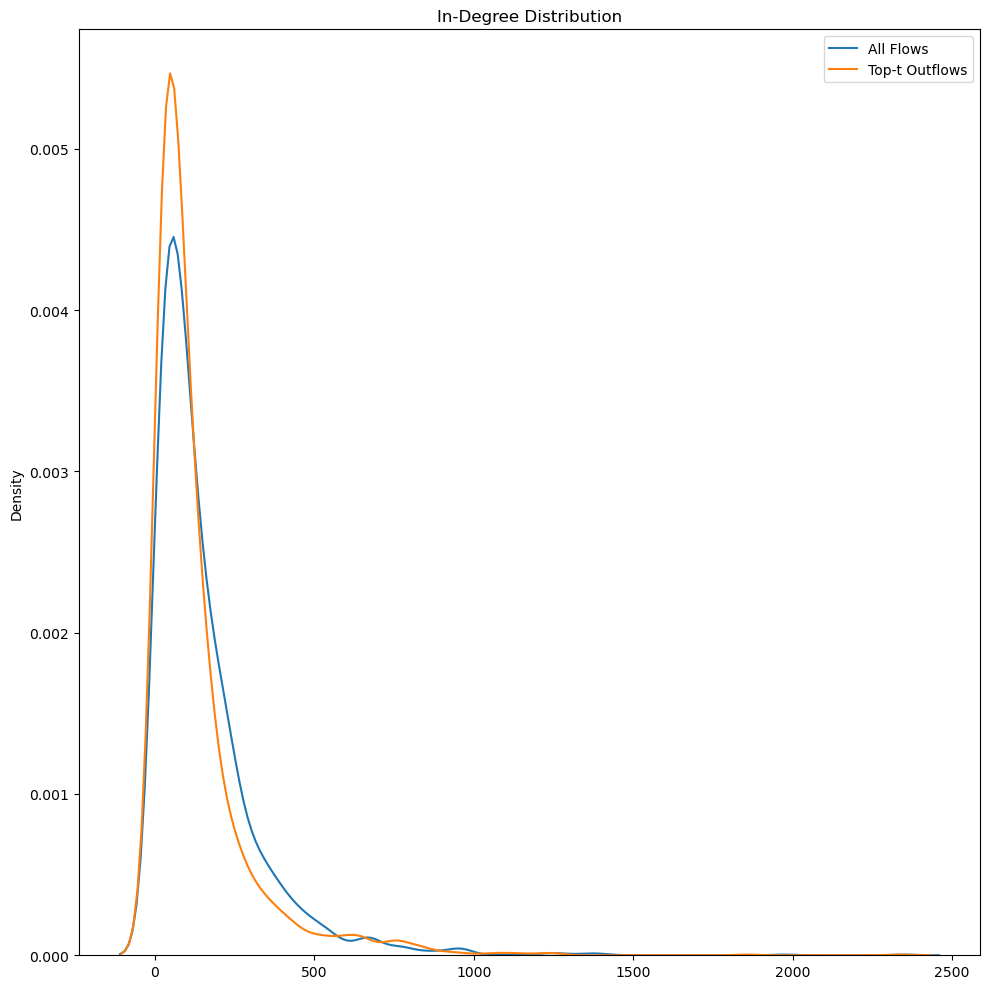

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130 # set this value based on your sparsification needs

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = 1 # flow presence marked as 1

# Convert the original flows to binary
flows_binary = (flows > 0).astype(int)

# Calculate the in-degree and out-degree distributions for all flows
in_degrees_all = np.sum(flows_binary, axis=0)
out_degrees_all = np.sum(flows_binary, axis=1)

# Calculate the in-degree and out-degree distributions for top-t outflows
in_degrees_t = np.sum(top_t_flows, axis=0)
out_degrees_t = np.sum(top_t_flows, axis=1)

# Plot the distributions
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

# In-degree
sns.kdeplot(in_degrees_all, ax=axs, label='All Flows')
sns.kdeplot(in_degrees_t, ax=axs, label='Top-t Outflows')
axs.set_title('In-Degree Distribution')
axs.legend()

# Out-degree
"""sns.kdeplot(out_degrees_all, ax=axs[1], label='All Flows')
sns.kdeplot(out_degrees_t, ax=axs[1], label='Top-t Outflows')
axs[1].set_title('Out-Degree Distribution')
axs[1].legend()"""

plt.tight_layout()
plt.show()


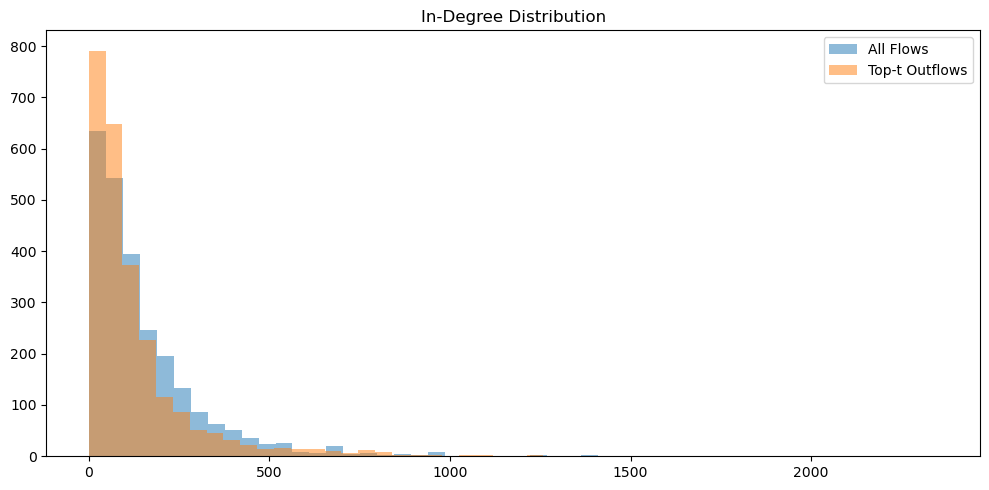

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130 # set this value based on your sparsification needs

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = 1 # flow presence marked as 1

# Convert the original flows to binary
flows_binary = (flows > 0).astype(int)

# Calculate the in-degree distributions for all flows and top-t outflows
in_degrees_all = np.sum(flows_binary, axis=0)
in_degrees_t = np.sum(top_t_flows, axis=0)

# Plot the distributions
plt.figure(figsize=(10, 5))

plt.hist(in_degrees_all, bins=50, alpha=0.5, label='All Flows')
plt.hist(in_degrees_t, bins=50, alpha=0.5, label='Top-t Outflows')
plt.title('In-Degree Distribution')
plt.legend()

plt.tight_layout()
plt.show()


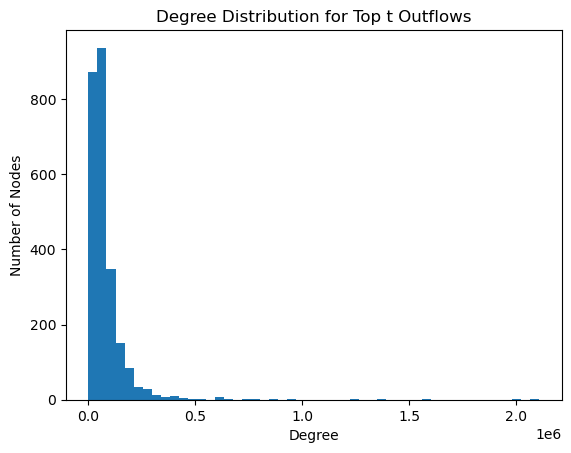

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix


# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130 # set this value based on your sparsification needs

# Initialize a sparse matrix to hold the top t flows
top_t_flows = np.zeros_like(flows)

# For each node (row), get the indices of the top t outflows
for i in range(flows.shape[0]):
    top_t_indices = np.argpartition(flows[i], -t)[-t:]
    top_t_flows[i, top_t_indices] = flows[i, top_t_indices]

# Calculate the degree distribution
degrees = np.sum(top_t_flows, axis=0) + np.sum(top_t_flows, axis=1)

# Plot the degree distribution
plt.hist(degrees, bins=50)
plt.title('Degree Distribution for Top t Outflows')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()


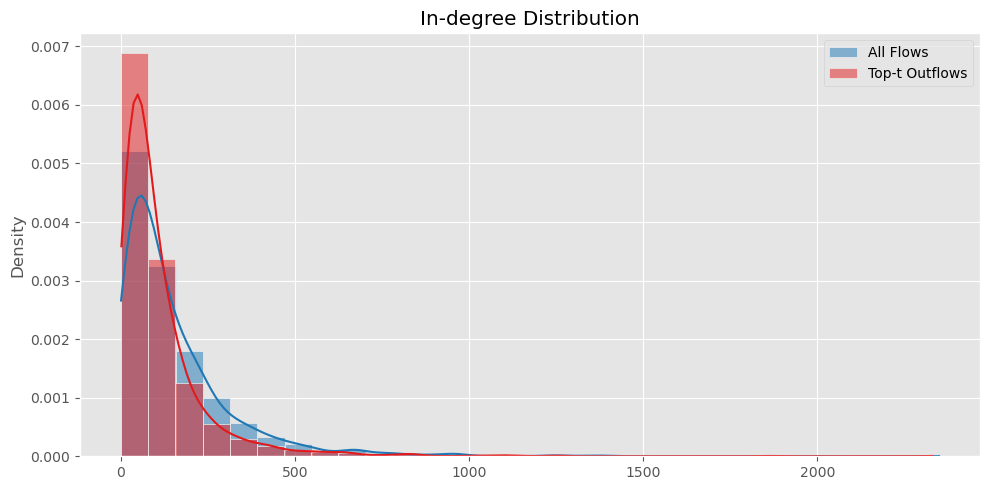

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")


# Define t
t = 130

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    # Handle case when there are less than t non-zero flows
    non_zero_flows = np.count_nonzero(flows[i])
    t_flows = min(t, non_zero_flows)
    
    top_t_indices = np.argpartition(flows[i], -t_flows)[-t_flows:]
    top_t_flows[i, top_t_indices] = 1 # flow presence marked as 1

# Convert the original flows to binary
flows_binary = (flows > 0).astype(int)

# Calculate the degree distributions for all flows and top-t outflows
degrees_all = np.sum(flows_binary, axis=0) 
degrees_t = np.sum(top_t_flows, axis=0)

# Change the default style of matplotlib
matplotlib.style.use('ggplot')

# Set a color palette
palette = sns.color_palette("Paired")

# Plot the distributions
plt.figure(figsize=(10, 5))

sns.histplot(degrees_all, kde=True, stat="density", label='All Flows', color=palette[1], bins=30)
sns.histplot(degrees_t, kde=True, stat="density", label='Top-t Outflows', color=palette[5], bins=30)
plt.title('In-degree Distribution')
plt.legend()

plt.tight_layout()
plt.savefig("indegree_distribution.png", dpi = 300)
plt.show()

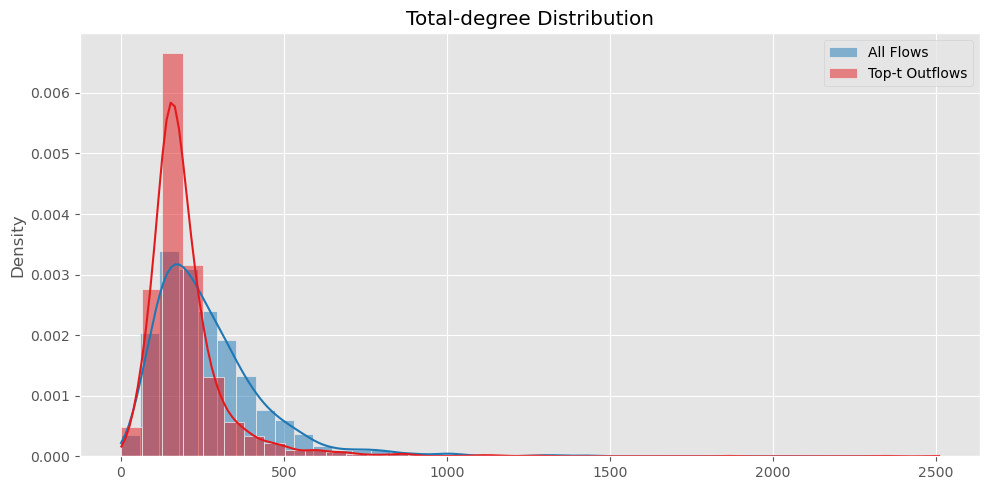

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# Load the data
flows = np.load(r"data\Mobility\cbg_visit_2019-03_2.npy")

# Define t
t = 130

# Construct the graph for top-t outflows
top_t_flows = np.zeros_like(flows)
for i in range(flows.shape[0]):
    # Handle case when there are less than t non-zero flows
    non_zero_flows = np.count_nonzero(flows[i])
    t_flows = min(t, non_zero_flows)
    
    top_t_indices = np.argpartition(flows[i], -t_flows)[-t_flows:]
    top_t_flows[i, top_t_indices] = 1 # flow presence marked as 1

# Convert the original flows to binary
flows_binary = (flows > 0).astype(int)

# Calculate the degrees based on the new definition
degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)
degrees_t = np.sum(np.logical_or(top_t_flows, top_t_flows.T), axis=1)

# Change the default style of matplotlib
matplotlib.style.use('ggplot')

# Set a color palette
palette = sns.color_palette("Paired")

# Plot the distributions
plt.figure(figsize=(10, 5))

sns.histplot(degrees_all, kde=True, stat="density", label='All Flows', color=palette[1], bins=40)
sns.histplot(degrees_t, kde=True, stat="density", label='Top-t Outflows', color=palette[5], bins=40)
plt.title('Total-degree Distribution')
plt.legend()

plt.tight_layout()
plt.savefig("total_degree_distribution.png", dpi = 300)
plt.show()

[256 142 140 ... 264 344 297]


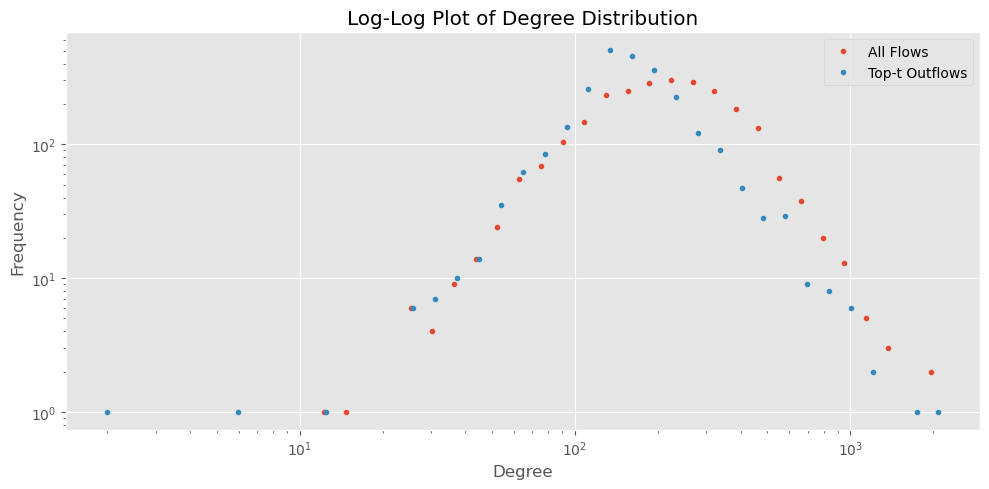

In [8]:
import numpy as np
import matplotlib.pyplot as plt
print(degrees_all)
# Calculate the degree distribution frequencies
counts_all, bins_all = np.histogram(degrees_all, bins=np.logspace(np.log10(min(degrees_all+1)), np.log10(max(degrees_all)), num=40))
counts_t, bins_t = np.histogram(degrees_t, bins=np.logspace(np.log10(min(degrees_t)), np.log10(max(degrees_t)), num=40))

# Generate the log-log plot
plt.figure(figsize=(10, 5))
plt.loglog(bins_all[:-1], counts_all, '.', label='All Flows')
plt.loglog(bins_t[:-1], counts_t, '.', label='Top-t Outflows')
plt.title('Log-Log Plot of Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out nodes with degree less than 130
filtered_degrees_all = degrees_all[degrees_all >= 5]
filtered_degrees_t = degrees_t[degrees_t >= 5]

# Calculate the degree distribution frequencies
counts_all, bins_all = np.histogram(filtered_degrees_all, bins=np.logspace(np.log10(min(filtered_degrees_all)), np.log10(max(filtered_degrees_all)), num=40))
counts_t, bins_t = np.histogram(filtered_degrees_t, bins=np.logspace(np.log10(min(filtered_degrees_t)), np.log10(max(filtered_degrees_t)), num=40))

# Generate the log-log plot
plt.figure(figsize=(10, 5))
plt.loglog(bins_all[:-1], counts_all, '.', label='All Flows')
plt.loglog(bins_t[:-1], counts_t, '.', label='Top-t Outflows')
plt.title('Log-Log Plot of Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.savefig('Log-Log Plot of Degree Distribution.png',dpi = 300)
plt.show()


NameError: name 'degrees_all' is not defined

C:\Users\zwy99\AppData\Local\Temp\ipykernel_34856\3096673498.py:5: RuntimeWarning: divide by zero encountered in log10
  log_counts_all = np.log10(counts_all)
C:\Users\zwy99\AppData\Local\Temp\ipykernel_34856\3096673498.py:7: RuntimeWarning: divide by zero encountered in log10
  log_counts_t = np.log10(counts_t)
d:\Software\anaconda\envs\zwy\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


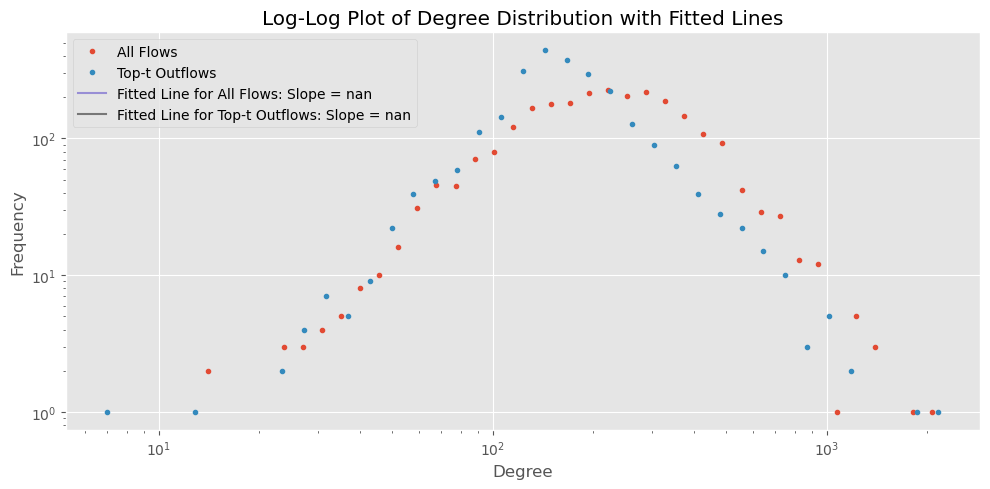

In [47]:
from scipy import stats

# Calculate logarithms of bins and counts for linear regression
log_bins_all = np.log10(bins_all[:-1])
log_counts_all = np.log10(counts_all)
log_bins_t = np.log10(bins_t[:-1])
log_counts_t = np.log10(counts_t)

# Fit a line to the log-log plot data
slope_all, intercept_all, r_value_all, p_value_all, std_err_all = stats.linregress(log_bins_all, log_counts_all)
slope_t, intercept_t, r_value_t, p_value_t, std_err_t = stats.linregress(log_bins_t, log_counts_t)

# Generate the log-log plot with fitted lines
plt.figure(figsize=(10, 5))
plt.loglog(bins_all[:-1], counts_all, '.', label='All Flows')
plt.loglog(bins_t[:-1], counts_t, '.', label='Top-t Outflows')
plt.loglog(bins_all[:-1], 10**(intercept_all + slope_all*log_bins_all), '-', label=f'Fitted Line for All Flows: Slope = {slope_all:.2f}')
plt.loglog(bins_t[:-1], 10**(intercept_t + slope_t*log_bins_t), '-', label=f'Fitted Line for Top-t Outflows: Slope = {slope_t:.2f}')

plt.title('Log-Log Plot of Degree Distribution with Fitted Lines')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


[1.14612804 1.2032109  1.26029376 1.31737662 1.37445948 1.43154234
 1.4886252  1.54570806 1.60279092 1.65987378 1.71695664 1.7740395
 1.83112236 1.88820522 1.94528808 2.00237094 2.0594538  2.11653666
 2.17361952 2.23070238 2.28778524 2.3448681  2.40195096 2.45903382
 2.51611668 2.57319954 2.6302824  2.68736526 2.74444812 2.80153098
 2.85861384 2.9156967  2.97277956 3.02986242 3.08694528 3.14402814
 3.201111   3.25819386 3.31527672] [0.30103          -inf       -inf       -inf 0.47712125 0.47712125
 0.60205999 0.69897    0.90308999 1.         1.20411998 1.49136169
 1.66275783 1.65321251 1.85125835 1.90308999 2.08635983 2.22530928
 2.25042    2.26245109 2.33445375 2.35602586 2.31386722 2.33645973
 2.27184161 2.16435286 2.03342376 1.96378783 1.62324929 1.462398
 1.43136376 1.11394335 1.07918125 0.         0.69897    0.47712125
       -inf 0.         0.        ]


d:\Software\anaconda\envs\zwy\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


ValueError: x and y must have same first dimension, but have shapes (24,) and (23,)

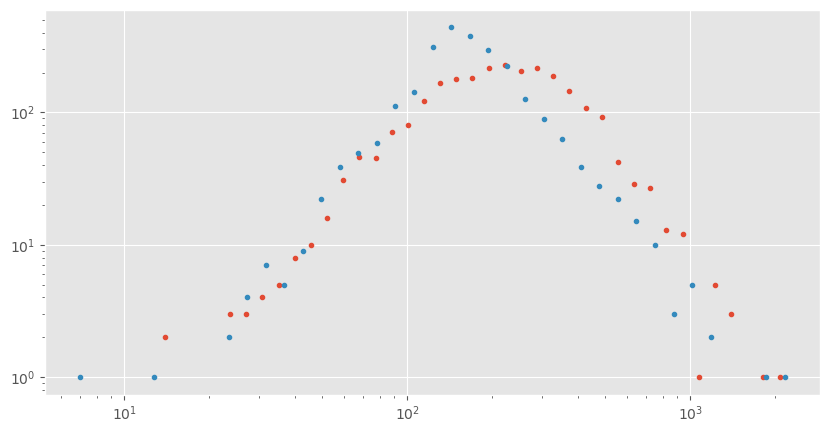

In [58]:
# Find the index where bins are close to 110
idx_all = np.abs(bins_all-110).argmin()
idx_t = np.abs(bins_t-110).argmin()

print(log_bins_all,log_counts_all)

# Fit a line to the log-log plot data for bins < 110 and bins >= 110 separately
slope_all_left, intercept_all_left, _, _, _ = stats.linregress(log_bins_all[:idx_all], log_counts_all[:idx_all])
slope_all_right, intercept_all_right, _, _, _ = stats.linregress(log_bins_all[idx_all:], log_counts_all[idx_all:])
slope_t_left, intercept_t_left, _, _, _ = stats.linregress(log_bins_t[:idx_t], log_counts_t[:idx_t])
slope_t_right, intercept_t_right, _, _, _ = stats.linregress(log_bins_t[idx_t:], log_counts_t[idx_t:])

# Generate the log-log plot with fitted lines for bins < 110 and bins >= 110 separately
plt.figure(figsize=(10, 5))
plt.loglog(bins_all[:-1], counts_all, '.', label='All Flows')
plt.loglog(bins_t[:-1], counts_t, '.', label='Top-t Outflows')
plt.loglog(bins_all[:idx_all], 10**(intercept_all_left + slope_all_left*log_bins_all[:idx_all]), '-', label=f'Fitted Line for All Flows (Degree < 110): Slope = {slope_all_left:.2f}')
plt.loglog(bins_all[idx_all:], 10**(intercept_all_right + slope_all_right*log_bins_all[idx_all:]), '-', label=f'Fitted Line for All Flows (Degree >= 110): Slope = {slope_all_right:.2f}')
plt.loglog(bins_t[:idx_t], 10**(intercept_t_left + slope_t_left*log_bins_t[:idx_t]), '-', label=f'Fitted Line for Top-t Outflows (Degree < 110): Slope = {slope_t_left:.2f}')
plt.loglog(bins_t[idx_t:], 10**(intercept_t_right + slope_t_right*log_bins_t[idx_t:]), '-', label=f'Fitted Line for Top-t Outflows (Degree >= 110): Slope = {slope_t_right:.2f}')

plt.title('Log-Log Plot of Degree Distribution with Fitted Lines')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
print(log_bins_all)

[1.14612804 1.2032109  1.26029376 1.31737662 1.37445948 1.43154234
 1.4886252  1.54570806 1.60279092 1.65987378 1.71695664 1.7740395
 1.83112236 1.88820522 1.94528808 2.00237094 2.0594538  2.11653666
 2.17361952 2.23070238 2.28778524 2.3448681  2.40195096 2.45903382
 2.51611668 2.57319954 2.6302824  2.68736526 2.74444812 2.80153098
 2.85861384 2.9156967  2.97277956 3.02986242 3.08694528 3.14402814
 3.201111   3.25819386 3.31527672]


C:\Users\zwy99\AppData\Local\Temp\ipykernel_27888\88362221.py:13: RuntimeWarning: divide by zero encountered in log10
  log_counts_all = np.log10(counts_all)
C:\Users\zwy99\AppData\Local\Temp\ipykernel_27888\88362221.py:15: RuntimeWarning: divide by zero encountered in log10
  log_counts_t = np.log10(counts_t)


[0.               -inf       -inf       -inf       -inf       -inf
 0.               -inf       -inf       -inf 0.               -inf
       -inf       -inf 0.77815125 0.84509804 1.         1.14612804
 1.54406804 1.79239169 1.92941893 2.13033377 2.41664051 2.70156799
 2.66275783 2.55388303 2.35410844 2.08635983 1.95424251 1.67209786
 1.44715803 1.462398   0.95424251 0.90308999 0.77815125 0.30103
       -inf 0.         0.        ]
[ 25.90010452  31.09921899  37.34198913  44.83791548  53.8385531
  64.64595352  77.62280123  93.20458502 111.91421247] [  6.   7.  10.  14.  35.  62.  85. 135. 261.]


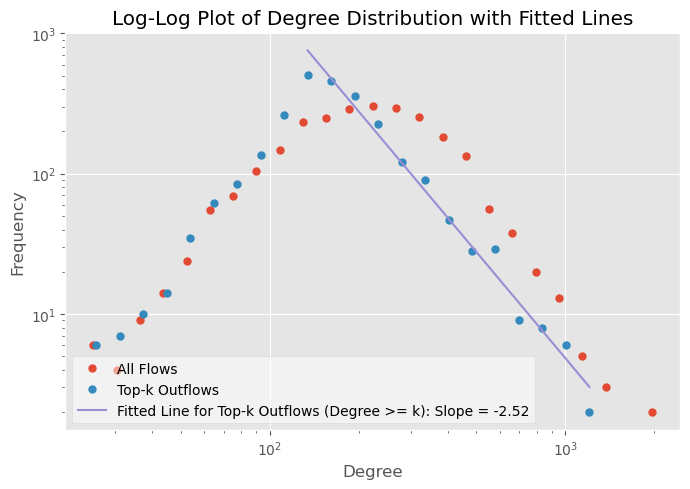

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your bins and counts calculated and stored in bins_all, bins_t, counts_all, counts_t
# bins_all, bins_t are 1D numpy arrays
# counts_all, counts_t are 1D numpy arrays

# Calculate logarithms of bins and counts
log_bins_all = np.log10(bins_all[:-1])
log_counts_all = np.log10(counts_all)
log_bins_t = np.log10(bins_t[:-1])
log_counts_t = np.log10(counts_t)

# Find the index where bins are close to 110
idx_all = np.abs(bins_all-130).argmin()
idx_t = np.abs(bins_t-130).argmin()

print(log_counts_t)
# Check for invalid values and only keep the valid ones
invalid_all_left = np.isnan(log_bins_all[:idx_all]) | np.isinf(log_bins_all[:idx_all]) | np.isnan(log_counts_all[:idx_all]) | np.isinf(log_counts_all[:idx_all]) | (log_bins_all[:idx_all] == 0) | (log_counts_all[:idx_all] == 0)
invalid_all_right = np.isnan(log_bins_all[idx_all:]) | np.isinf(log_bins_all[idx_all:]) | np.isnan(log_counts_all[idx_all:]) | np.isinf(log_counts_all[idx_all:]) | (log_bins_all[idx_all:] == 0) | (log_counts_all[idx_all:] == 0)
invalid_t_left = np.isnan(log_bins_t[:idx_t]) | np.isinf(log_bins_t[:idx_t]) | np.isnan(log_counts_t[:idx_t]) | np.isinf(log_counts_t[:idx_t]) | (log_bins_t[:idx_t] == 0) | (log_counts_t[:idx_t] == 0)
invalid_t_right = np.isnan(log_bins_t[idx_t:]) | np.isinf(log_bins_t[idx_t:]) | np.isnan(log_counts_t[idx_t:]) | np.isinf(log_counts_t[idx_t:]) | (log_bins_t[idx_t:] == 0) | (log_counts_t[idx_t:] == 0)

valid_log_bins_all_left = log_bins_all[:idx_all][~invalid_all_left]
valid_log_counts_all_left = log_counts_all[:idx_all][~invalid_all_left]
valid_log_bins_all_right = log_bins_all[idx_all:][~invalid_all_right]
valid_log_counts_all_right = log_counts_all[idx_all:][~invalid_all_right]
valid_log_bins_t_left = log_bins_t[:idx_t][~invalid_t_left]
valid_log_counts_t_left = log_counts_t[:idx_t][~invalid_t_left]
valid_log_bins_t_right = log_bins_t[idx_t:][~invalid_t_right]
valid_log_counts_t_right = log_counts_t[idx_t:][~invalid_t_right]



print(10**valid_log_bins_t_left, 10**valid_log_counts_t_left)
# Fit a line to the log-log plot data for bins < 110 and bins >= 110 separately
slope_all_left, intercept_all_left, _, _, _ = stats.linregress(valid_log_bins_all_left, valid_log_counts_all_left)
slope_all_right, intercept_all_right, _, _, _ = stats.linregress(valid_log_bins_all_right, valid_log_counts_all_right)
slope_t_left, intercept_t_left, _, _, _ = stats.linregress(valid_log_bins_t_left, valid_log_counts_t_left)
slope_t_right, intercept_t_right, _, _, _ = stats.linregress(valid_log_bins_t_right, valid_log_counts_t_right)


# Generate the log-log plot with fitted lines for bins < 110 and bins >= 110 separately
plt.figure(figsize=(7, 5))
plt.loglog(np.concatenate((10**(valid_log_bins_all_left),10**(valid_log_bins_all_right))), np.concatenate((10**(valid_log_counts_all_left),10**(valid_log_counts_all_right))), '.', label='All Flows',markersize=10)
plt.loglog(np.concatenate((10**(valid_log_bins_t_left),10**(valid_log_bins_t_right))), np.concatenate((10**(valid_log_counts_t_left),10**(valid_log_counts_t_right))), '.', label='Top-k Outflows',markersize=10)
#plt.loglog(10**(valid_log_bins_all_left), 10**(intercept_all_left + slope_all_left*valid_log_bins_all_left), '-', label=f'Fitted Line for All Flows (Degree < 110): Slope = {slope_all_left:.2f}')
#plt.loglog(10**(valid_log_bins_all_right), 10**(intercept_all_right + slope_all_right*valid_log_bins_all_right), '-', label=f'Fitted Line for All Flows (Degree >= 110): Slope = {slope_all_right:.2f}')
#plt.loglog(10**(valid_log_bins_t_left), 10**(intercept_t_left + slope_t_left*valid_log_bins_t_left), '-', label=f'Fitted Line for Top-t Outflows (Degree < 110): Slope = {slope_t_left:.2f}')
plt.loglog(10**(valid_log_bins_t_right), 10**(intercept_t_right + slope_t_right*valid_log_bins_t_right), '-', label=f'Fitted Line for Top-k Outflows (Degree >= k): Slope = {slope_t_right:.2f}')

plt.title('Log-Log Plot of Degree Distribution with Fitted Lines')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(facecolor='white', framealpha=0.5)

plt.tight_layout()
plt.savefig('Log-Log Plot of Degree Distribution with Fitted Lines.png',dpi=300)
plt.show()
